In [ ]:
#Подготовка данных

In [3]:
import pandas as pd

In [320]:
df = pd.read_csv('train1.csv', sep = ';', encoding = '1251')   

In [321]:
df.head(10)
df.tail(15)

,ID,Order Date,Class,Region,Sub-Category,Sales
9787,7181.0,06.01.2015,Первый класс,Москва,Art,"4829,744"
9788,7475.0,06.01.2015,Стандарт,Москва,Chairs,"37302,92"
9789,7476.0,06.01.2015,Стандарт,Москва,Binders,"28254,37"
9790,7477.0,06.01.2015,Стандарт,Москва,Art,"15681,76"
9791,7478.0,06.01.2015,Стандарт,Москва,Phones,"5966,342"
9792,7479.0,06.01.2015,Стандарт,Москва,Phones,"35624,54"
9793,7480.0,06.01.2015,Стандарт,Москва,Fasteners,"19856,51"
9794,7481.0,06.01.2015,Стандарт,Москва,Paper,"31250,09"
9795,1760.0,05.01.2015,Стандарт,Владивосток,Art,"8639,472"
9796,740.0,04.01.2015,Стандарт,Урал,Labels,"15246,05"


In [7]:
df.dtypes

ID              float64
Order Date       object
Class            object
Region           object
Sub-Category     object
Sales            object
dtype: object

In [8]:
df.shape

(9802, 6)

In [9]:
df.index

RangeIndex(start=0, stop=9802, step=1)

In [322]:
df.columns = ['order_id', 'order_date', 'class', 'region', 'sub_category', 'sales']  #переименовываем столбцы

In [11]:
df['order_id'] = df['order_id'].astype('str').replace('\.0', '', regex = True) #меняем типы данных

In [12]:
df['sales'] = df['sales'].str.replace(',', '.').astype('float') #меняем типы данных

In [42]:
df['sales'] = round(df['sales'], 2)

In [14]:
df[df.isna().values.any(axis =1)]  #Проверяем есть ли NaN

,order_id,order_date,class,region,sub_category,sales
9800,nan,NaN,NaN,NaN,NaN,NaN
9801,nan,NaN,NaN,NaN,NaN,NaN


In [350]:
df = df.dropna()  #Удаляем пустые значения

In [351]:
df.shape

(9800, 6)

In [17]:
v1 = lambda x: float(x[1:-1])

In [519]:
df.dtypes

order_id               float64
order_date      datetime64[ns]
class                   object
region                  object
sub_category            object
sales                  float64
dtype: object

In [521]:
#Задание_3:  Для этого задания необходимо разбить все покупки на энное количество групп “Sale_group”  (Допустим маленькие продажи, средние и высокие) на основе SalesСгруппировать данные на основе региона и группы продаж (Region, Sale_group). Определить основные тенденции и паттерны. Выделить наиболее «прибыльную» группу


In [ ]:
#Проведем абс анализ для того, чтобы разбить покупки на группы

In [47]:
groupped_by_sub_category = df.groupby('sub_category').agg({'sales':sum})
groupped_by_sub_category

,sales
sub_category,
Accessories,17274947.61
Appliances,10364179.51
Art,17832463.27
Binders,33911974.35
Bookcases,5353205.77
Chairs,14125682.88
Copiers,1542749.30
Envelopes,5805653.06
Fasteners,4739452.77


In [45]:
category_ttl_share = round((grouped_by_sub_category['sales']/sum(grouped_by_sub_category['sales'])), 2).sort_values(ascending=False)
category_ttl_share

sub_category
Binders        0.15
Paper          0.14
Furnishings    0.10
Phones         0.09
Accessories    0.08
Art            0.08
Storage        0.08
Chairs         0.06
Appliances     0.05
Labels         0.04
Tables         0.03
Envelopes      0.03
Bookcases      0.02
Supplies       0.02
Fasteners      0.02
Machines       0.01
Copiers        0.01
Name: sales, dtype: float64

In [48]:
groupped_df = category_ttl_share.cumsum().reset_index()
groupped_df

,sub_category,sales
0,Binders,0.15
1,Paper,0.29
2,Furnishings,0.39
3,Phones,0.48
4,Accessories,0.56
5,Art,0.64
6,Storage,0.72
7,Chairs,0.78
8,Appliances,0.83
9,Labels,0.87


In [49]:
import numpy as np

In [472]:
groupped_df['abc'] = np.where(groupped_df['sales'] < 0.8, 'A', np.where(groupped_df['sales'] < 0.95, 'B', 'C'))
groupped_df

,sub_category,sales,abc
0,Binders,0.15,A
1,Paper,0.29,A
2,Furnishings,0.39,A
3,Phones,0.48,A
4,Accessories,0.56,A
5,Art,0.64,A
6,Storage,0.72,A
7,Chairs,0.78,A
8,Appliances,0.83,B
9,Labels,0.87,B


In [490]:
abc_groupped = df.merge(groupped_df, how ='left', on='sub_category')  #Соединим таблицы, чтобы добавить столбец с результатом абс анализа в исходный датафрейм, создадим новый датафрейм
abc_groupped

,order_id,order_date,class,region,sub_category,sales_x,sales_y,abc
0,646.0,2018-12-30,Стандарт,Урал,Appliances,37229.080,0.83,B
1,907.0,2018-12-30,Стандарт,Владивосток,Bookcases,20994.610,0.95,C
2,908.0,2018-12-30,Стандарт,Владивосток,Phones,42133.860,0.48,A
3,909.0,2018-12-30,Стандарт,Владивосток,Binders,10612.000,0.15,A
4,1297.0,2018-12-30,Стандарт,Калиниград,Binders,28781.130,0.15,A
...,...,...,...,...,...,...,...,...
9795,1760.0,2015-05-01,Стандарт,Владивосток,Art,8639.472,0.64,A
9796,740.0,2015-04-01,Стандарт,Урал,Labels,15246.050,0.87,B
9797,741.0,2015-04-01,Стандарт,Урал,Storage,20415.810,0.72,A
9798,742.0,2015-04-01,Стандарт,Урал,Binders,4559.085,0.15,A


In [555]:
#Построим сводную таблицу для группировки продаж по региону и группе
table_regions_abc = pd.pivot_table(abc_groupped,
                            index = ['region'],
                            columns = ['abc'],
                            values = 'sales_x')
table_regions_abc

abc,A,B,C
region,,,
Владивосток,22962.502677,22617.096873,23513.898171
Калиниград,22861.008222,23147.408447,22950.663459
Москва,23214.948144,23451.552406,20829.812279
Урал,22774.504069,22705.601300,22909.207709


<AxesSubplot:xlabel='region'>

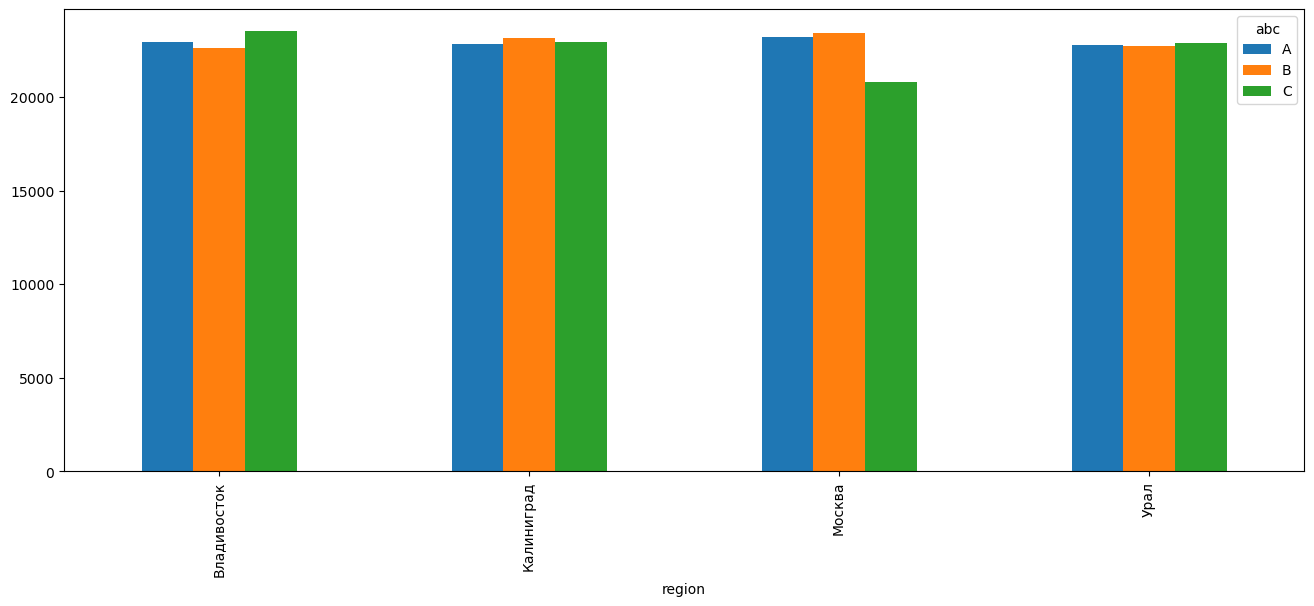

In [556]:
table_regions_abc.plot(kind='bar')

In [ ]:
#1 задание: Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)? Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)? Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)?


In [461]:
#Какие подгруппы товаров наиболее часто покупают за все время продаж?
groupped_by_sub_category_count = (df.groupby('sub_category').agg({'sales':len})).sort_values('sales', ascending=False)
groupped_by_sub_category_count

,sales
sub_category,
Binders,1492
Paper,1338
Furnishings,931
Phones,876
Storage,832
Art,785
Accessories,756
Chairs,607
Appliances,459


<AxesSubplot:xlabel='sub_category'>

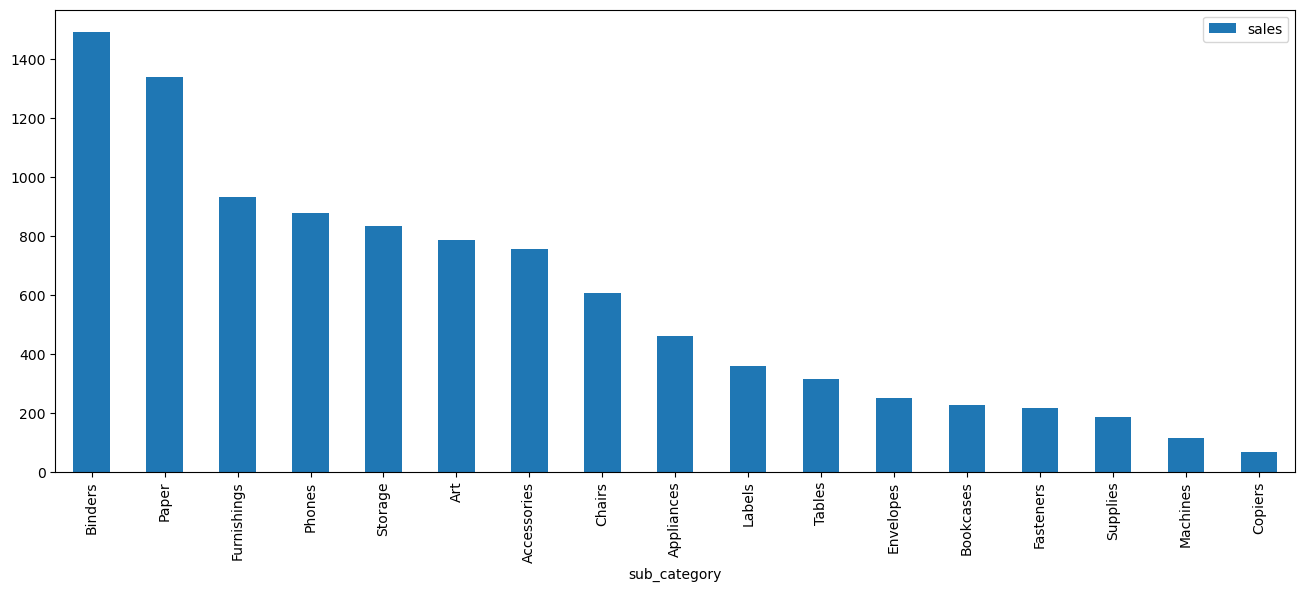

In [557]:
groupped_by_sub_category_count.plot(kind='bar')

In [ ]:
#Какие подгруппы товаров наиболее часто покупают за последние два года

In [434]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [130]:
from datetime import date
from dateutil.relativedelta import relativedelta

In [198]:
mx_date =  pd.to_datetime(df['order_date'].max())

Timestamp('2018-12-30 00:00:00')

In [201]:
years_to_date_2 = pd.to_datetime(mx_date - relativedelta(years=2))

Timestamp('2016-12-30 00:00:00')

In [534]:
table_ytd2 = pd.pivot_table(df[df['order_date'] >= years_to_date_2],
                            index = 'sub_category',
                            values = 'sales',
                            aggfunc= [len])
table_ytd2

,len
,sales
sub_category,
Accessories,450
Appliances,274
Art,458
Binders,907
Bookcases,130
Chairs,348
Copiers,36
Envelopes,131


<AxesSubplot:xlabel='sub_category'>

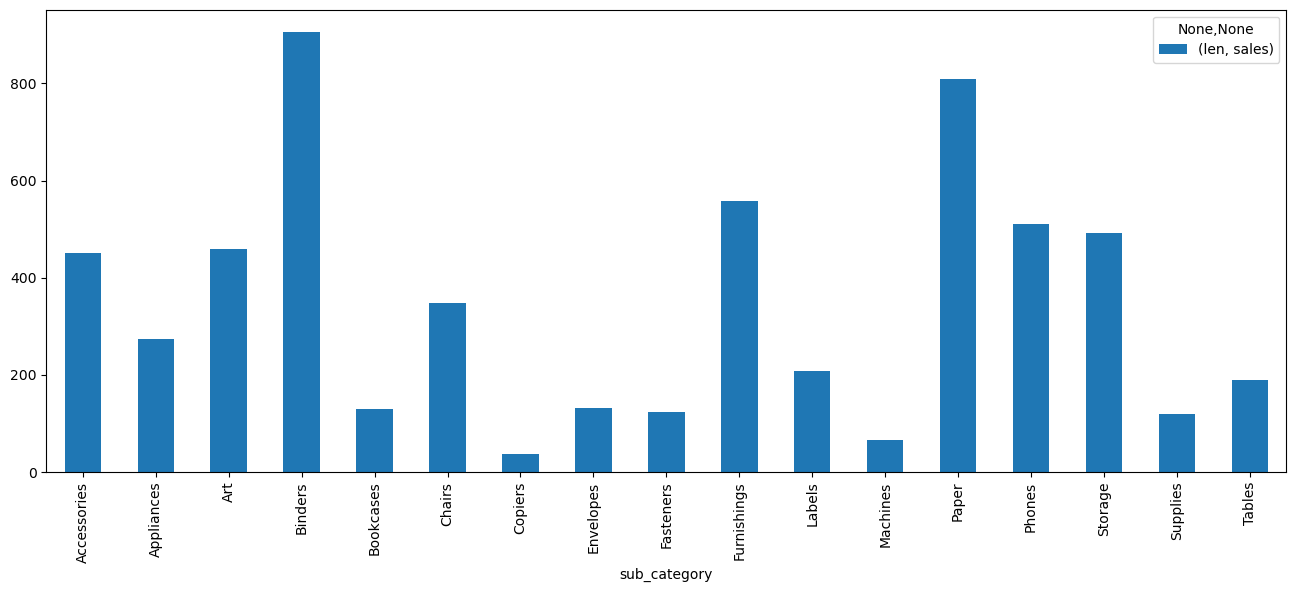

In [558]:
table_ytd2.plot(kind='bar')

In [ ]:
#Какие подгруппы товаров наиболее часто покупают за последний год

In [227]:
years_to_date_1 = pd.to_datetime(mx_date - relativedelta(years=1))

In [233]:
table_ytd1 = pd.pivot_table(df[df['order_date'] >= years_to_date_1],
                            index = 'sub_category',
                            values = 'sales',
                            aggfunc= [len])
table_ytd1

,len
,sales
sub_category,
Accessories,266
Appliances,161
Art,282
Binders,496
Bookcases,76
Chairs,188
Copiers,22
Envelopes,71


<AxesSubplot:xlabel='sub_category'>

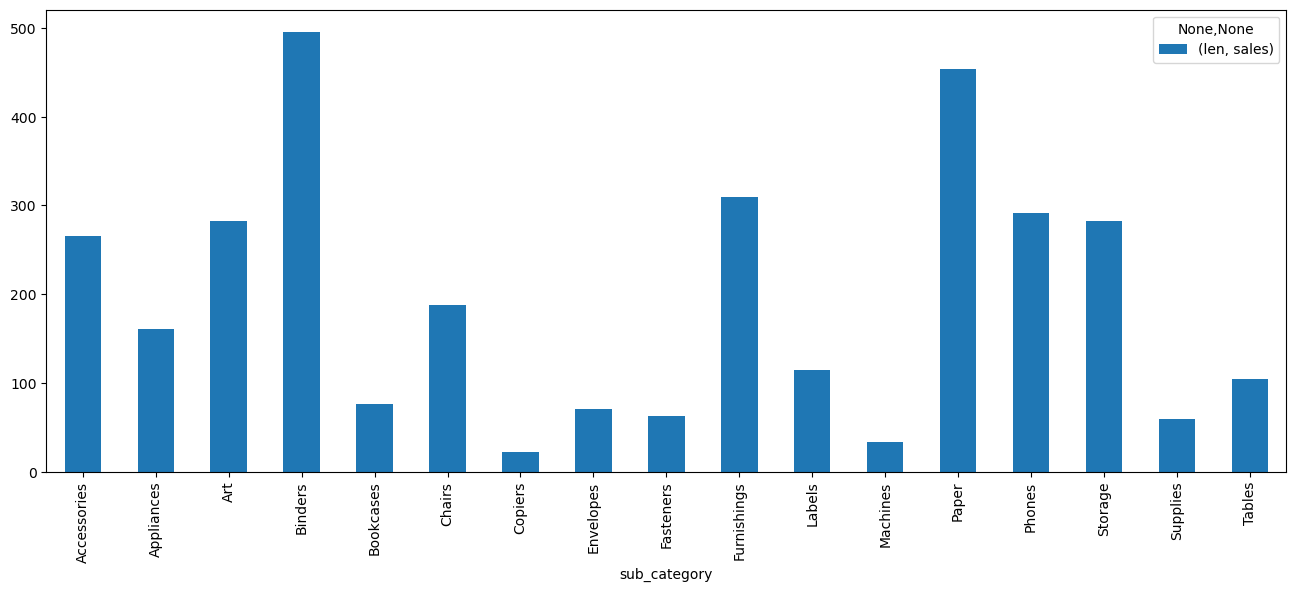

In [561]:
table_ytd1.plot(kind ='bar')

In [ ]:
#2 задание: построить boxplot («Ящик с усами») на основе продаж (Sales). Найти мажоритарную черту (т.е. избавиться от аномалий и представить четкую картину распределения величин). Можно использовать правило трех сигм. 

In [236]:
#Разведочный анализ данных
df.info

<bound method NDFrame.describe of      order_id order_date     class       region sub_category     sales
0         646 2018-12-30  Стандарт         Урал   Appliances  37229.08
1         907 2018-12-30  Стандарт  Владивосток    Bookcases  20994.61
2         908 2018-12-30  Стандарт  Владивосток       Phones  42133.86
3         909 2018-12-30  Стандарт  Владивосток      Binders  10612.00
4        1297 2018-12-30  Стандарт   Калиниград      Binders  28781.13
...       ...        ...       ...          ...          ...       ...
9795     1760 2015-05-01  Стандарт  Владивосток          Art   8639.47
9796      740 2015-04-01  Стандарт         Урал       Labels  15246.05
9797      741 2015-04-01  Стандарт         Урал      Storage  20415.81
9798      742 2015-04-01  Стандарт         Урал      Binders   4559.08
9799     7981 2015-03-01  Стандарт         Урал        Paper  11726.47

[9800 rows x 6 columns]>

In [238]:
df.describe()  #инфо о таблице: среднее, среднеквадратичн откл, медиана и т.д. Близость медианы и среднего - здесь практически совпадают

,sales
count,9800.000000
mean,22921.757763
std,12601.999780
min,1002.790000
25%,12135.625000
50%,22882.060000
75%,33730.130000
max,44995.410000


In [241]:
df['sub_category'].value_counts(normalize=True)

Binders        0.152245
Paper          0.136531
Furnishings    0.095000
Phones         0.089388
Storage        0.084898
Art            0.080102
Accessories    0.077143
Chairs         0.061939
Appliances     0.046837
Labels         0.036429
Tables         0.032041
Envelopes      0.025306
Bookcases      0.023061
Fasteners      0.021837
Supplies       0.018776
Machines       0.011735
Copiers        0.006735
Name: sub_category, dtype: float64

In [243]:
df['sub_category'].unique()

array(['Appliances', 'Bookcases', 'Phones', 'Binders', 'Fasteners',
       'Chairs', 'Paper', 'Furnishings', 'Art', 'Storage', 'Labels',
       'Accessories', 'Tables', 'Supplies', 'Machines', 'Copiers',
       'Envelopes'], dtype=object)

array([[<AxesSubplot:title={'center':'sales'}>]], dtype=object)

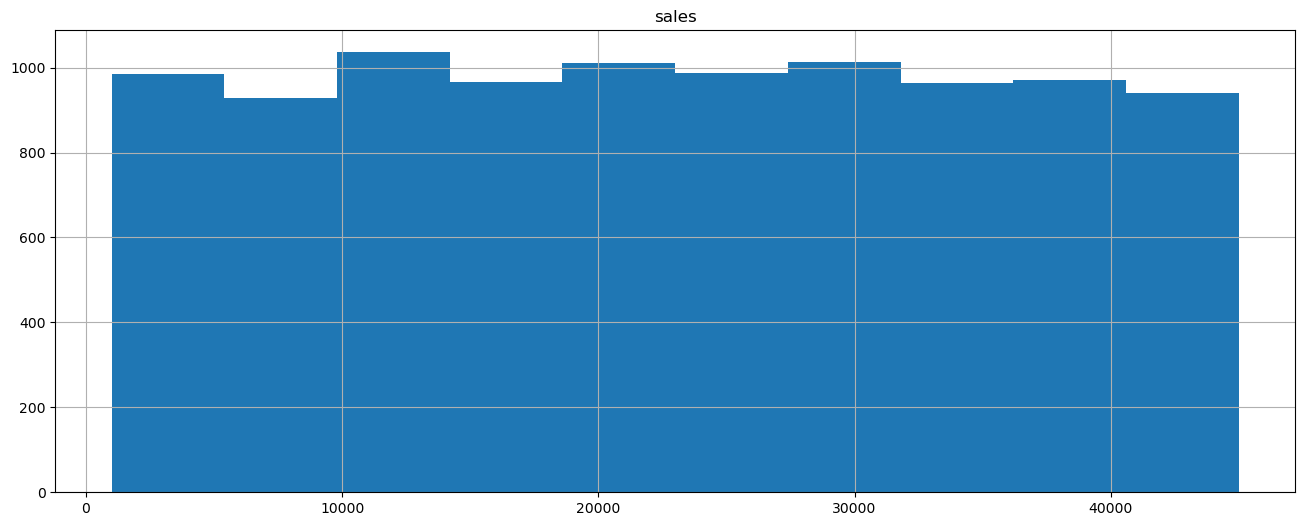

In [291]:
df.hist('sales')    #значения распределены равномерно, нет выбросов

In [417]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

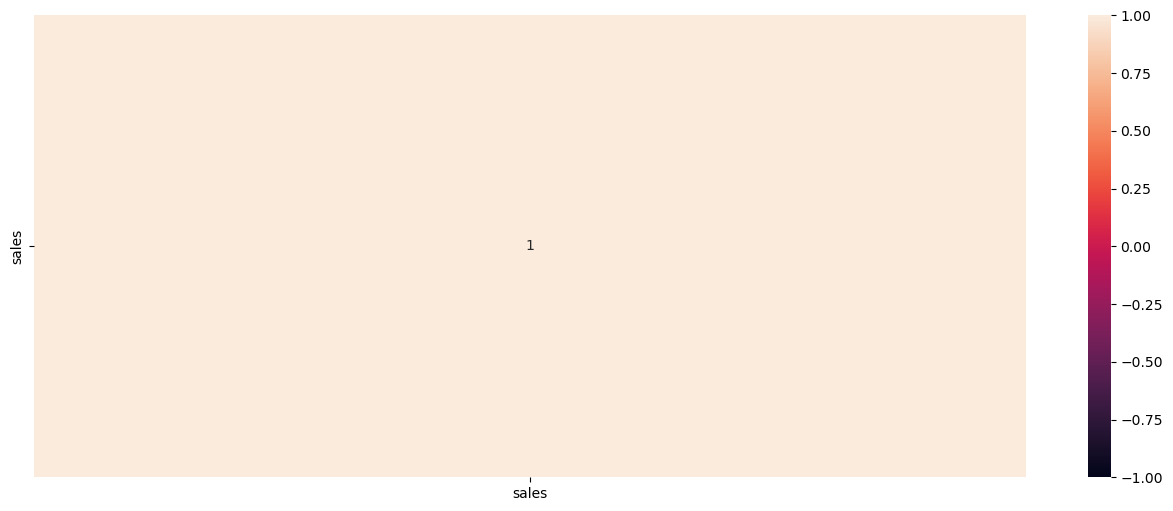

In [260]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), vmax = 1, vmin = -1, annot=True)  #показывает взаоимосвязь между переменными

In [262]:
plt.rcParams['figure.figsize'] = (16,6)

<AxesSubplot:xlabel='sales'>

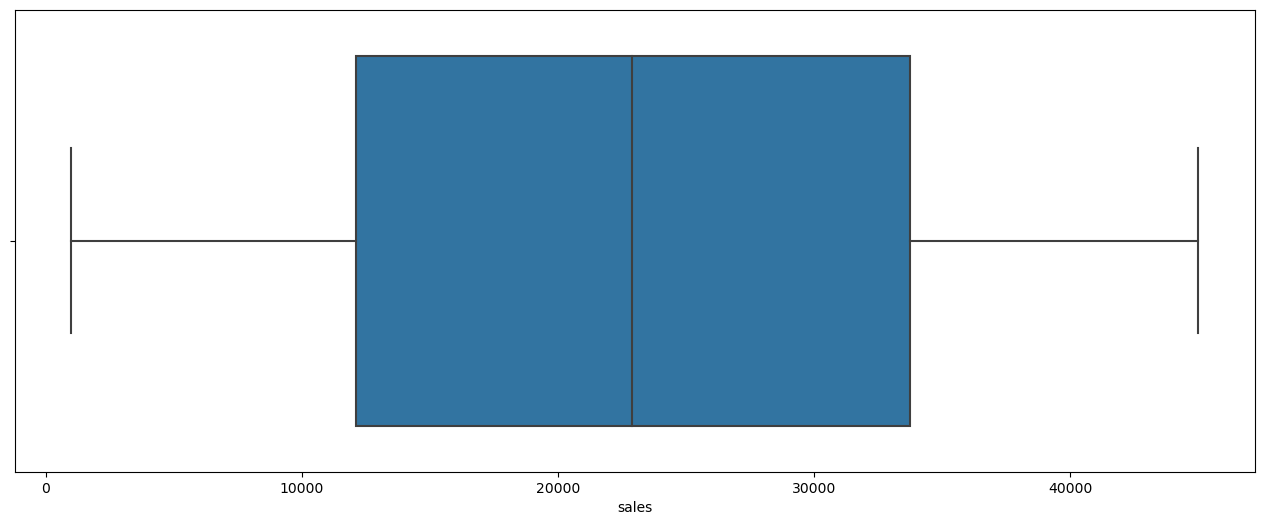

In [290]:
sns.boxplot(df['sales'])   #выбросов нет

In [275]:
df.groupby(['region', 'sub_category'])['sales', 'order_id'].agg({'sales':sum, 'order_id':len})

C:\Users\Daria\AppData\Local\Temp\ipykernel_6136\3048079557.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['region', 'sub_category'])['sales', 'order_id'].agg({'sales':sum, 'order_id':len})


sales  order_id
region      sub_category                      
Владивосток Accessories   4682843.79       203
            Appliances    2873705.90       123
            Art           4794732.74       225
            Binders       9926525.28       427
            Bookcases     1700875.81        70
...                              ...       ...
Урал        Paper         6911113.66       313
            Phones        4428066.94       197
            Storage       4665555.43       205
            Supplies       782135.89        36
            Tables        1592449.66        72

[68 rows x 2 columns]

In [277]:
np.median(df['sales'])

22882.06

In [283]:
np.average(df['sales'])

22921.757763265305

In [285]:
np.var(df['sales'])

158794193.31345522

In [286]:
np.std(df['sales'])

12601.35680446575

array([[<AxesSubplot:title={'center':'order_date'}>,
        <AxesSubplot:title={'center':'sales'}>]], dtype=object)

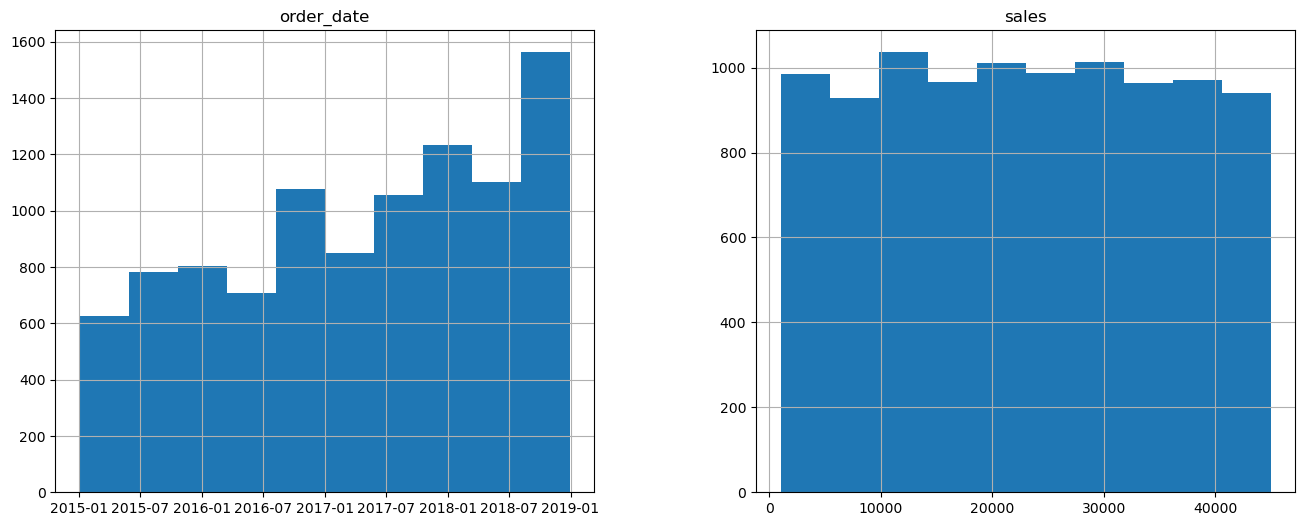

In [296]:
df.hist()

In [409]:
def outlier_std(data, col, threshold=3):
    
    mean = data[col].mean()
    std = data[col].mean()
    
    up_bound = mean + threshold * std
    low_bound = mean - threshold * std
    
    anomalies = pd.concat([data[col] > up_bound, data[col] < low_bound], axis = 1).any(axis=1)
    
    return anomalies, up_bound, low_bound

In [394]:
a, l, r  = outlier_std(df, 'sales')
a

0       False
1       False
2       False
3       False
4       False
        ...  
9795    False
9796    False
9797    False
9798    False
9799    False
Length: 9800, dtype: bool

In [412]:
def get_columns_outliers(data, function=outlier_std, threshold=3):
    outliers = pd.Series(data=False*len(data), index=data.index, name='is_outlier')
    comparison_table={}
    for column in data.columns:
        anomalies, upper_bound, lower_bound = outlier_std(df, 'sales')
        comparison_table[column]=upper_bound, lower_bound, sum(anomalies), 100*sum(anomalies)/len(anomalies)
        outliers.loc[anomalies[anomalies].index] = True
        
    comparison_table = pd.DataFrame(comparison_table).T
    comparison_table.columns = ['upper_bound', 'lower_bound', 'anomalies_count', 'anomalies_percentage']
    return comparison_table, outliers

In [414]:
comparison_table, std_outliers = get_columns_outliers(df)

In [415]:
comparison_table

,upper_bound,lower_bound,anomalies_count,anomalies_percentage
order_id,91687.030946,-45843.515473,0.0,0.0
order_date,91687.030946,-45843.515473,0.0,0.0
class,91687.030946,-45843.515473,0.0,0.0
region,91687.030946,-45843.515473,0.0,0.0
sub_category,91687.030946,-45843.515473,0.0,0.0
sales,91687.030946,-45843.515473,0.0,0.0


In [ ]:
#Задание 4 - Спрогнозировать продажи для подкатегорий любым методом регрессии:  Phones, Art


In [ ]:
#Спрогнозируем продажи для категории Phones

In [494]:
phones = df[df.sub_category == 'Phones']  #Отфильтруем изнчальный датафрейм по категории Phones

Text(0, 0.5, 'Sum_of_sales')

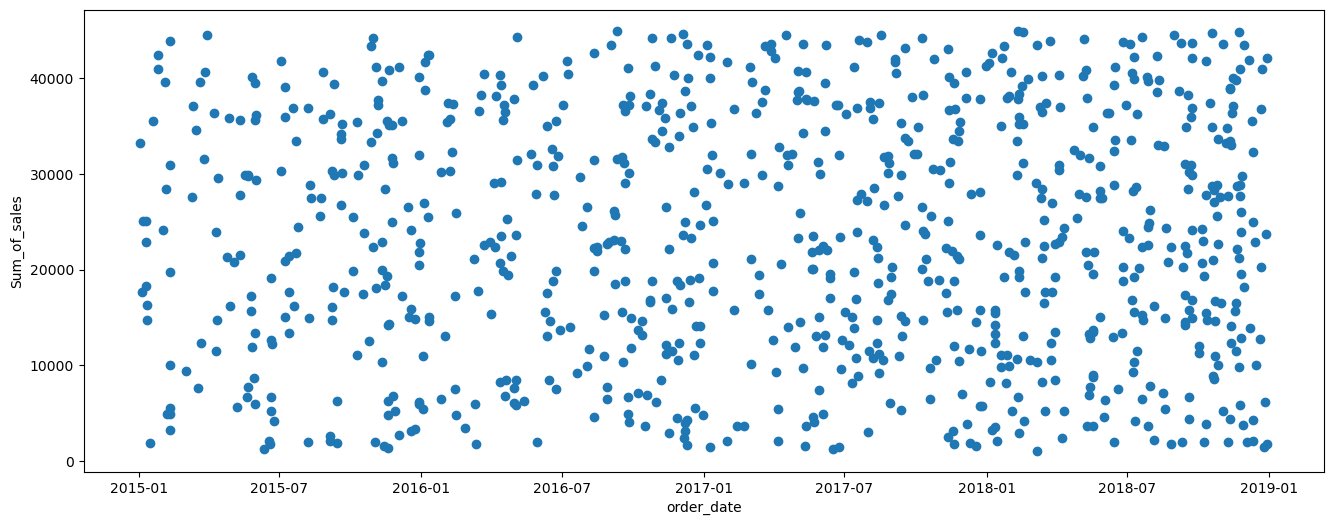

In [496]:
#Построим диаграмму рассеивания, чтобы посмотреть как распределены продажи по датам
plt.scatter(phones['order_date'], phones['sales'])  
plt.xlabel('order_date')
plt.ylabel('Sum_of_sales')

In [497]:
from sklearn.linear_model import LinearRegression   #импортируем функцию линейной регрессии

In [498]:
model = LinearRegression()

In [499]:
x = pd.DataFrame(phones['order_date'])   #зададим столбцы для коффициентов Х и У
y = pd.DataFrame(phones['sales'])

In [500]:
model.fit(x, y)

LinearRegression()

In [501]:
model.coef_    #Коэфициент угла наклона

array([[4.76166444e-15]])

In [502]:
model.intercept_  

array([16120.81563747])

C:\Users\Daria\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- sales
Feature names seen at fit time, yet now missing:
- order_date

  warnings.warn(message, FutureWarning)


Text(0, 0.5, 'sales')

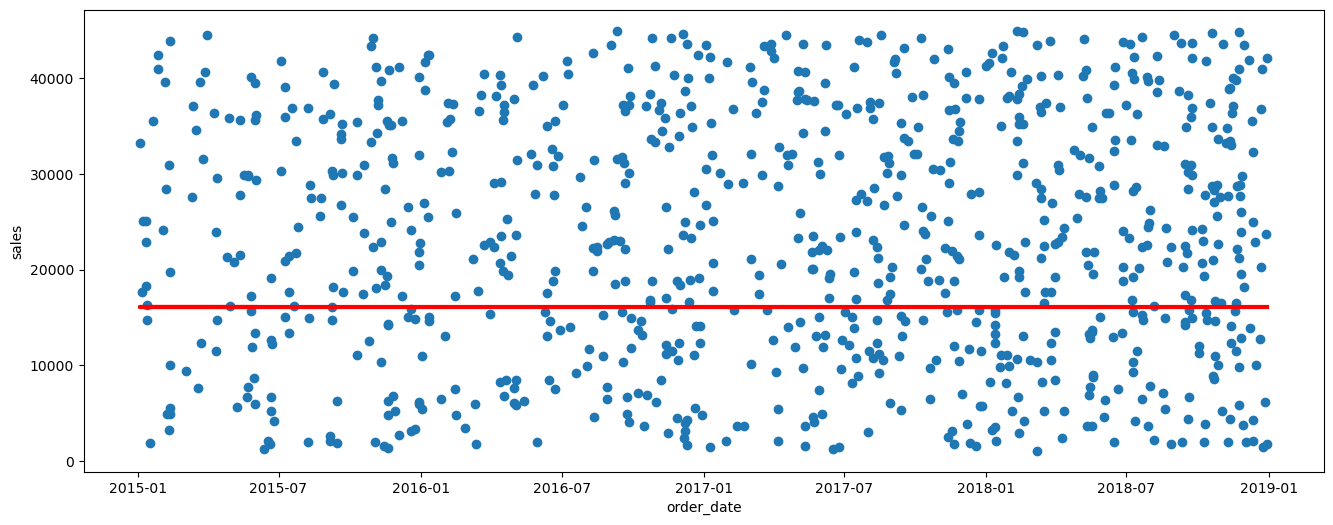

In [518]:
plt.scatter(phones['order_date'], phones['sales'])

plt.plot(x, model.predict(y), color='red', linewidth=3)

plt.xlabel('order_date')
plt.ylabel('sales')


In [ ]:
#Спрогнозируем продажи для категории Art

In [504]:
arts = df[df.sub_category == 'Art']

Text(0, 0.5, 'Sum_of_sales')

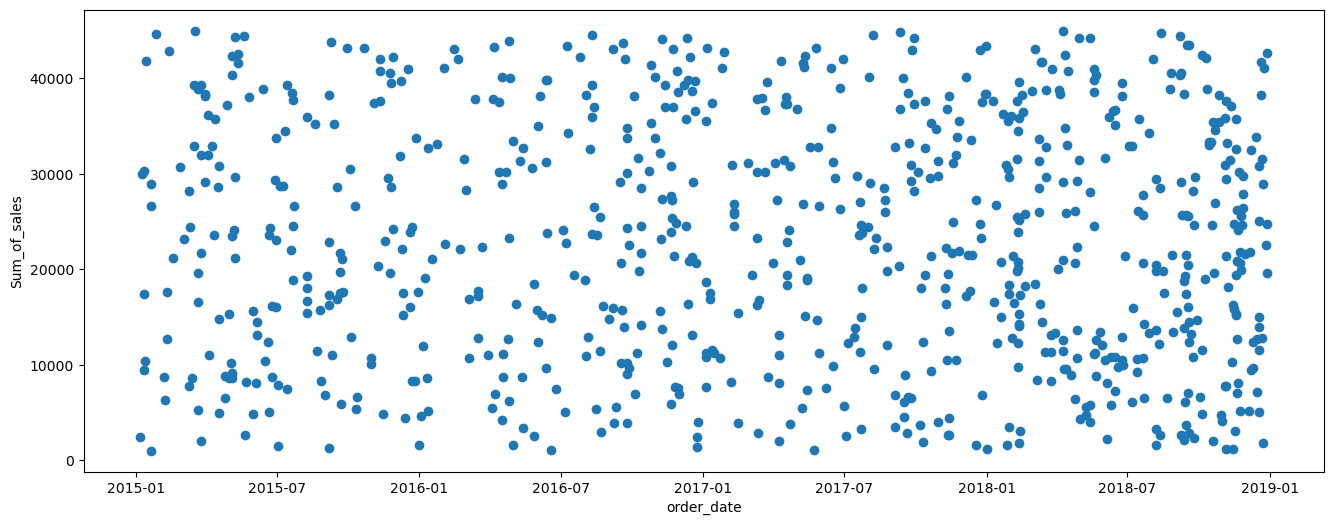

In [506]:
plt.scatter(arts['order_date'], arts['sales'])
plt.xlabel('order_date')
plt.ylabel('Sum_of_sales')

In [507]:
model_arts = LinearRegression()

In [508]:
x_a = pd.DataFrame(arts['order_date'])
y_a = pd.DataFrame(arts['sales'])

In [509]:
model_arts.fit(x_a, y_a)

LinearRegression()

In [510]:
model_arts.coef_

array([[-1.10630428e-14]])

In [511]:
model_arts.intercept_

array([39219.74377156])

C:\Users\Daria\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- sales
Feature names seen at fit time, yet now missing:
- order_date

  warnings.warn(message, FutureWarning)


Text(0, 0.5, 'sales')

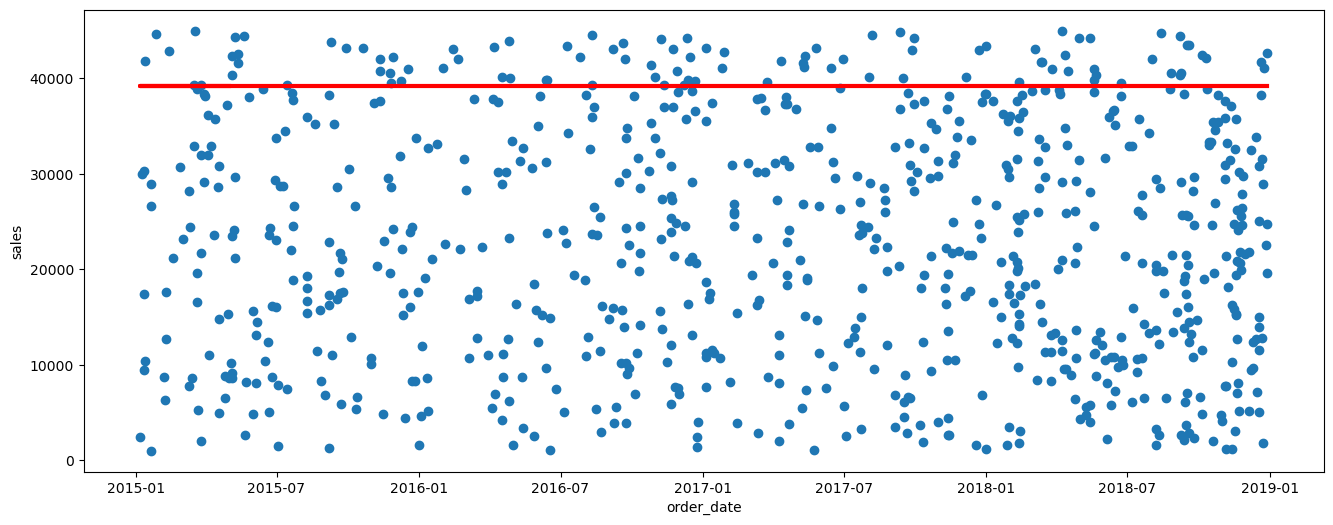

In [513]:
plt.scatter(arts['order_date'], arts['sales'])

plt.plot(x_a, model_arts.predict(y_a), color='red', linewidth=3)

plt.xlabel('order_date')
plt.ylabel('sales')